In [85]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df_salaries = pd.read_csv('ds_salaries.csv')  
df_salaries.head() 

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


First, we need to get rid of unused columns such as Unnamed: 0

In [87]:
df_salaries.drop(['Unnamed: 0'], axis=1, inplace=True)  

Let's look for nan or null values.

In [88]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [89]:
df_salaries.isnull().sum()  

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [90]:
df_salaries.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

It seems like the dataset is clean.

Now, let's change the values in remote ratio: On-Site<-0, Remote<-100, Hybrid<-50 

In [91]:
df_salaries.replace([0, 50, 100], ['On-Site', 'Hybrid', 'Remote'], inplace = True)

Add country names using the [ISO](https://en.wikipedia.org/wiki/ISO_3166-2) codes for each country. 

In [92]:
iso = pd.read_csv('wikipedia-iso-country-codes.csv')

df_salaries = df_salaries.merge(iso[['Alpha-2 code', 'English short name lower case']], how='left',
            left_on='company_location',right_on='Alpha-2 code').drop('Alpha-2 code', axis=1)

df_salaries.rename(columns={'English short name lower case': 'company_country'}, inplace=True)

df_salaries = df_salaries[['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_country',
 'company_size'
 ]]
df_salaries.head()  

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_country,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,On-Site,DE,Germany,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,On-Site,JP,Japan,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,United Kingdom,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,On-Site,HN,Honduras,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,United States Of America,L


Let us proceed by analyzing the company location info.

In [93]:
df_salaries['company_country'].value_counts().head(10)

United States Of America    355
United Kingdom               47
Canada                       30
Germany                      28
India                        24
France                       15
Spain                        14
Greece                       11
Japan                         6
Netherlands                   4
Name: company_country, dtype: int64

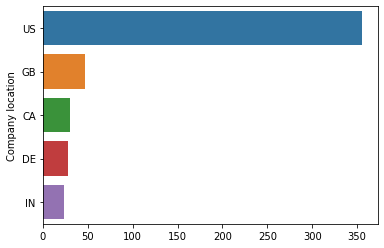

In [137]:
num_top=5
chart=sns.countplot(y = 'company_location', data= df_salaries,order=df_salaries.company_location.value_counts().iloc[:num_top].index)
chart.set_ylabel('Company location')
chart.set_xlabel('')
plt.show()

US has the most number of data related jobs. Let's see how many of them are remote

In [129]:
df_salaries.groupby(['company_country','remote_ratio'])['company_location'].count().reset_index(name='count').sort_values(by='count', ascending=False)

,company_country,remote_ratio,count
82,United States Of America,Remote,266
81,United States Of America,On-Site,69
80,United States Of America,Hybrid,20
78,United Kingdom,On-Site,19
12,Canada,Remote,19
...,...,...,...
47,Malaysia,Remote,1
48,Malta,Hybrid,1
50,Mexico,Remote,1
51,"Moldova, Republic of",On-Site,1


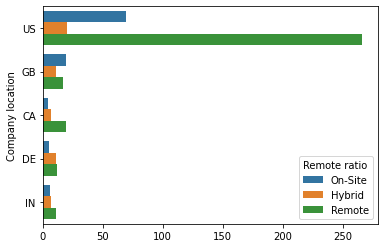

In [138]:
chart=sns.countplot(y = 'company_location', data= df_salaries,hue= 'remote_ratio',order=df_salaries.company_location.value_counts().iloc[:num_top].index)  
chart.set_ylabel('Company location')
chart.legend(title='Remote ratio')
chart.set_xlabel('')
plt.show()